In [171]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

GRT_QUERY_ENDPOINT = "https://api.thegraph.com/subgraphs/name/convex-community/volume-mainnet-test"
#GRT_QUERY_ENDPOINT = "https://api.thegraph.com/subgraphs/id/QmQq4a8b5HDWZEEjKonAz9qaFwdgugMEu5tfZ9gTqRsW3m"

def grt_query(query):
    r = requests.post(GRT_QUERY_ENDPOINT, json={'query': query})
    return r.json()['data']

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [172]:
fee_query = """
{ pools(first: 1000) {
  isV2
  id
  name
  dailyPoolSnapshots(first: 1000 orderBy: timestamp orderDirection: desc) {
    timestamp
    adminFeesUSD
    lpFeesUSD
    totalDailyFeesUSD
    eventFeesUSD
    baseApr
    tvl
  }
}
}
"""

In [173]:
data = grt_query(fee_query)['pools']
df = pd.DataFrame([{k: v for k, v in dict({key: val for key, val in entry.items() if key in ['id', 'isV2', 'name']}, **snapshot).items()} for entry in data for snapshot in entry['dailyPoolSnapshots']])
df['totalDailyFeesUSD'] = df['totalDailyFeesUSD'].astype(float)
df['eventFeesUSD'] = df['eventFeesUSD'].astype(float) * 2
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df = df.sort_values('timestamp', ascending=True)
df

,isV2,id,name,timestamp,adminFeesUSD,lpFeesUSD,totalDailyFeesUSD,eventFeesUSD,baseApr,tvl
23197,False,0x3ef6a01a0f81d6046290f3e2a8c5b843e738e604,Curve.fi HUSD/3Crv,2020-10-30,0,0,0.0000,0.0000,0,1618238.164297469500077074301977482
22087,False,0x3e01dd8a5e1fb3481f0f589056b428fc308af0fb,Curve.fi USDK/3Crv,2020-10-30,0,0,0.0000,0.0000,0,258124.3979277809995780190329914143
97559,False,0xe7a24ef0c5e95ffb0f6684b813a78f2a3ad7d171,Curve.fi LinkUSD/3Crv,2020-10-30,0,0,0.0000,0.0000,0,324714.5089474895485385295627355576
31480,False,0x4f062658eaaf2c1ccf8c8e36d6824cdf41167956,Curve.fi GUSD/3Crv,2020-10-30,0,0,0.0000,0.0000,0,2953830.877334078670882153174081435
53980,False,0x8474ddbe98f5aa3179b3b3f5942d724afcdec9f6,Curve.fi MUSD/3Crv,2020-10-30,0,0,0.0000,0.0000,0,3290287.17577386970062590376944461
...,...,...,...,...,...,...,...,...,...,...
101763,False,0xee60f4a3487c07b4570ccffef315401c4c5744c8,Curve.fi Factory USD Metapool: MBSC DeFi (USD),2022-08-05,0,0,0.0000,0.0000,0,0
31681,True,0x50f3752289e1456bfa505afd37b241bca23e685d,Curve.fi Factory Crypto Pool: BADGER/WBTC,2022-08-05,16.1121802468997175592741551143885,16.1121802468997175592741551143885,32.2244,85.4013,0.000003813387055388592757692954385629722,4177549.45618357360216808502449046
91290,False,0xdc0b9c549809bd4bde021bd35a99f612d472d827,Curve.fi Factory USD Metapool: RC_eXRD_0.04_DA...,2022-08-05,0,0,0.0000,0.0000,0,0.00000000000030840583242723869547581699072
102533,False,0xf03bd3cfe85f00bf5819ac20f0870ce8a8d1f0d8,Curve.fi Factory Plain Pool: Sharedstake ETH/v...,2022-08-05,0,0,0.0000,0.0000,0,18022.83531809994508856937727454128


In [174]:
pd.set_option('display.max_rows', 500)
df['baseApr'] = df['baseApr'].astype(float)
df['tvl'] = df['tvl'].astype(float)
df['totalDailyFeesUSD'] = df['totalDailyFeesUSD'].astype(float)
df.sort_values('totalDailyFeesUSD', ascending=False).head(100)

,isV2,id,name,timestamp,adminFeesUSD,lpFeesUSD,totalDailyFeesUSD,eventFeesUSD,baseApr,tvl
78197,False,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,Curve.fi DAI/USDC/USDT,2021-02-05,2827049.690380021676829425942058194,2827049.690380021676829425942058194,5654099.3808,0.0000,0.0049,609398234.3230
93934,False,0xdebf20617708857ebe4f679508e7b7863a8a8eee,Curve.fi aDAI/aUSDC/aUSDT,2021-02-09,1046745.938443272389264310525881573,1046745.938443272389264310525881573,2093491.8769,0.0000,0.0102,109391437.8008
85962,True,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,2022-06-17,858437.2237052520833446165212106446,858437.2237052520833446165212106444,1716874.4474,1592165.1075,0.0031,253160090.7828
36574,False,0x5a6a4d54456819380173272a5e8e9b9904bdf41b,Curve.fi Factory USD Metapool: Magic Internet ...,2022-01-28,538639.3921990104053852901328769626,538639.3921990104053852901328769624,1077278.7844,0.0000,0.0002,1092228491.9805
34696,False,0x55a8a39bc9694714e2874c1ce77aa1e599461e18,Curve.fi Factory Plain Pool: MIM-UST,2022-01-29,517205.6821348570488234138630533167,517205.6821348570488234138630533163,1034411.3643,0.0000,0.0022,82538009.3856
36573,False,0x5a6a4d54456819380173272a5e8e9b9904bdf41b,Curve.fi Factory USD Metapool: Magic Internet ...,2022-01-29,461781.6072957869260941336212154771,461781.6072957869260941336212154771,923563.2146,0.0000,0.0004,665877904.0454
77735,False,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,Curve.fi DAI/USDC/USDT,2022-05-13,441581.9868829734044096747082582393,441581.9868829734044096747082582393,883163.9738,0.0000,0.0002,1602573924.2917
84687,False,0xceaf7747579696a2f0bb206a14210e3c9e6fb269,Curve.fi Factory USD Metapool: wormhole v2 UST...,2022-05-12,435555.1880318499436619725955090296,435555.1880318499436619725955090296,871110.3761,0.0000,0.0008,261981696.2910
82660,False,0xc5424b857f758e906013f3555dad202e4bdb4567,Curve.fi ETH/sETH,2021-02-09,423712.8149622350428484009618063285,423712.8149622350428484009618063285,847425.6299,0.0000,0.0017,268531159.6131
31382,False,0x4f062658eaaf2c1ccf8c8e36d6824cdf41167956,Curve.fi GUSD/3Crv,2021-02-05,415997.1341722401269483500071680716,415997.1341722401269483500071680716,831994.2683,0.0000,0.0028,151600683.8632


In [175]:
df[df['id'] == '0xd51a44d3fae010294c616388b506acda1bfaae46'][['timestamp', 'baseApr']]

,timestamp,baseApr
86297,2021-07-17,0.0000
86296,2021-07-18,0.0000
86295,2021-07-19,0.0001
86294,2021-07-20,0.0000
86293,2021-07-21,0.0001
86292,2021-07-22,0.0002
86291,2021-07-23,0.0001
86290,2021-07-24,0.0000
86289,2021-07-25,0.0000
86288,2021-07-26,0.0000


<AxesSubplot:xlabel='timestamp'>

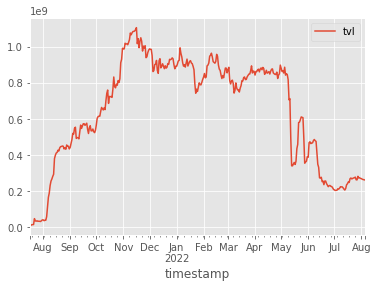

In [176]:
df[df['id'] == '0xd51a44d3fae010294c616388b506acda1bfaae46'].plot(x='timestamp', y='tvl')

<AxesSubplot:xlabel='timestamp'>

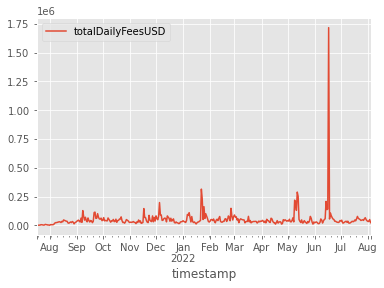

In [177]:
df[df['id'] == '0xd51a44d3fae010294c616388b506acda1bfaae46'].plot(x='timestamp', y='totalDailyFeesUSD')

<AxesSubplot:xlabel='timestamp'>

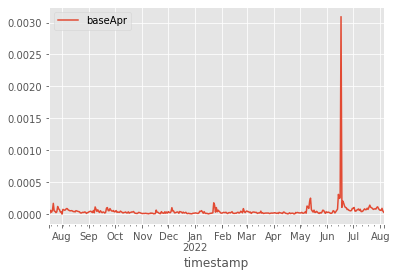

In [178]:
df[df['id'] == '0xd51a44d3fae010294c616388b506acda1bfaae46'].plot(x='timestamp', y='baseApr')

<AxesSubplot:xlabel='timestamp'>

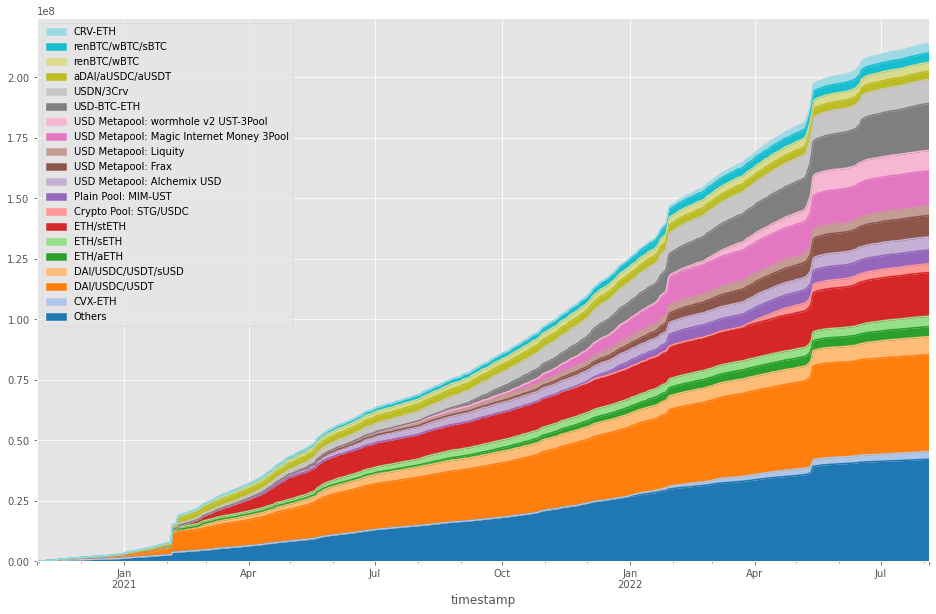

In [179]:
df['cumulativeDailyFeesUSD'] = (df['totalDailyFeesUSD']).groupby(df['id']).cumsum()
chart_data = df[['name', 'timestamp', 'cumulativeDailyFeesUSD']].pivot_table('cumulativeDailyFeesUSD', ['timestamp'], 'name', aggfunc='sum')
top_performers = chart_data.mean().sort_values(ascending=False)[:19].index.tolist()
df_others = df.copy()
df_others['name'] = df_others['name'].apply(lambda x: x if x in top_performers else 'Others')
df['cumulativeDailyFeesUSD'] = (df['totalDailyFeesUSD']).groupby(df['id']).cumsum()
chart_data_others = df_others[['name', 'timestamp', 'cumulativeDailyFeesUSD']].pivot_table('cumulativeDailyFeesUSD', ['timestamp'], 'name', aggfunc='sum')
chart_data_others['Others'] = df_others[df_others['name'] == 'Others'][['timestamp', 'cumulativeDailyFeesUSD']].groupby('timestamp').sum()['cumulativeDailyFeesUSD']
chart_data_others.columns = [s.replace('Curve.fi Factory ', '').replace('Curve.fi ', '').replace('Curve ', '') for s in chart_data_others.columns]
cols = chart_data_others.columns.tolist()
chart_data_others[([cols[-1], *cols[1:-1], cols[0]])].plot.area(figsize=(16, 10), legend='reverse', colormap="tab20")

In [180]:
WEEK = 3600 * 24 * 7
df_week = pd.DataFrame([{k: v for k, v in dict({key: val for key, val in entry.items() if key in ['id', 'isV2', 'name']}, **snapshot).items()} for entry in data for snapshot in entry['dailyPoolSnapshots']])
df_week['totalDailyFeesUSD'] = df_week['totalDailyFeesUSD'].astype(float)
df_week['timestamp'] = df_week['timestamp'].apply(lambda x: ((int(x) // WEEK) * WEEK))
df_week['timestamp'] = pd.to_datetime(df_week['timestamp'],unit='s')
df_week = df_week.sort_values('timestamp', ascending=True)
df_week[['totalDailyFeesUSD', 'timestamp', 'name', 'id']].groupby(['timestamp']).sum()

,totalDailyFeesUSD
timestamp,
2020-10-29,139380.2495
2020-11-05,295287.0187
2020-11-12,478040.1544
2020-11-19,366542.0986
2020-11-26,354029.4256
2020-12-03,274377.8630
2020-12-10,266009.9119
2020-12-17,383495.8783
2020-12-24,432562.8640


In [181]:
df_week[['totalDailyFeesUSD', 'timestamp', 'name', 'id']].groupby(['timestamp']).sum().sum() / 2

totalDailyFeesUSD   106981843.4310
dtype: float64